OBJECTIVES:



1.   **Business Case: Touring Company wants to know during the month(s) of June-August, what country has the highest chance of an incident occurring?**
2.   Implement at least FIVE data cleaning techniques (missing values, duplicates, formatting, etc)
3. Once data is clean, we analyze and validate our hypothesis or answer our business case.
4. For the project to be mark completed the following has to be checked off:

*   A new repository with the name data-cleaning-pandas on your GitHub account.
*   At least 1 Jupyter notebook is required.
*   A README with the completed project documentation.
*   Slideshow (7-10 slides)
*   A working code that meets all technical requirements, built by you.




In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
# Read the csv file, save as df
url="https://drive.google.com/uc?export=download&id=15sSsNwcH-k0p4TEj5KkqeItQhJYFLEna"
df = pd.read_excel(url)

# Display the first few rows of the DataFrame
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number1,original order
0,2000-05-09 00:00:00,2000,Invalid,AUSTRALIA,Victoria,"Koonya Beach, Melbourne",NaN,Severed human foot washed ashore (in sneaker w...,NaN,NaN,...,NaN,NaN,Shark involvement prior to death was not confi...,"T. Peake, GSAF",2000.05.09-foot.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.05.09,2000.05.09,4272.0
1,2000-05-07 00:00:00,2000,Unprovoked,PAPUA NEW GUINEA,Madang Province,"Long Island near Madang, about 500 km (310 mil...",Standing,Adam,M,NaN,...,N,NaN,NaN,Reuters; Papua New Guinea Post-Courier,2000.05.07.b-Adam.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.05.07.b,2000.05.07.b,4271.0
2,2000-05-07 00:00:00,2000,Unprovoked,PAPUA NEW GUINEA,Madang Province,"Long Island near Madang, about 500 km (310 mil...",Diving,male,M,NaN,...,Y,NaN,NaN,Reuters; Papua New Guinea Post-Courier,2000.05.07.a-diver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.05.07.a,2000.05.07.a,4270.0
3,2000-05-13 00:00:00,2000,Sea Disaster,NEW CALEDONIA,South Province,Mont Dore,Air Disaster - Piper aircraft crashed into the...,3 people,NaN,NaN,...,Y,NaN,Tiger sharks & bull sharks (20 sharks in all),"W. Leander; Les Nouvelles Caledoniennes, 5/15/...",2000.05.13-aircraft.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.05.13,2000.05.13,4273.0
4,2000-06-19 00:00:00,2000,Unprovoked,USA,Florida,"Seminole Avenue, Ormond Beach, Volusia County",Standing,Jacob Alegood,M,NaN,...,N,07h50,NaN,"S. Petersohn, GSAF; M. I. Johnson, Daytona Bea...",2000.06.19-Alegood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.06.19,2000.06.19,4280.0


In [5]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number1',
       'original order'],
      dtype='object')

In [6]:
# Display last few rows of dataframe
df.tail()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number1,original order
1043,2023-05-11 00:00:00,2023,Unprovoked,USA,Florida,"Fort Pierce, St. Lucie County",Sitting,Ella Reed,F,13,...,N,Afternoon,"Bull shark, 4'",".A. Curriie, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
1044,2023-05-11 00:00:00,2023,Provoked,USA,Hawaii,"Kualoa, Oahu",Kayak fishing,Scott Haraguchi,M,NaN,...,N,NaN,Tiger shark,"J.Marcharnd, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
1045,2023-05-14 00:00:00,2023,Unprovoked,USA,South Carolina,"Isle of Palms, Charleston County",Swimming,Claire Gugerty,F,24,...,N,17h00,NaN,"The Island Eye, 5/15/2023",NaN,NaN,NaN,NaN,NaN,NaN
1046,2023-05-18 00:00:00,2023,Unprovoked,USA,Florida,"Marathon, Monroe County",Spearfishing,Kevin Blanco,M,20,...,N,15h00,NaN,"J. Marchand, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
1047,2023-05-09 00:00:00,2023,Provoked,CUBA,Mayabeque,Puerto Escondido,Spearfishing,Maro Alejandro Díaz Jiménez,M,NaN,...,Y,NaN,Bull shark,"Ciber Cuba, 5/10/.2023",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Display column names to identify which columns are not needed
print(list(df.columns))

# Find the index of 'pdf' column
source_index = df.columns.get_loc('pdf')

# Create a list of column names to drop (from 'pdf' column onward)
columns_to_drop = df.columns[source_index:]

# drop source, time, name, species because they are not pertinent to our research question.
other_columns_to_drop = ['Name','Time','Species','Source']

# Drop the remaining useless columns
df.drop(columns=columns_to_drop, inplace=True)
df.drop(columns=other_columns_to_drop, inplace = True)

# Clean up remaining column names
def clean_column_names(column_names):
    return column_names.str.lower().str.replace(' ', '_')

df.columns = clean_column_names(df.columns)

#replace the null/incorrect column name
df.rename(columns={'unnamed:_11': 'fatal'}, inplace=True)
df.rename(columns={'species_': 'species'}, inplace=True)

# Print the modified DataFrame columns
print("Modified columns:", df.columns)

['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number1', 'original order']
Modified columns: Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'sex', 'age', 'injury', 'fatal'],
      dtype='object')


In [8]:
df

,date,year,type,country,state,location,activity,sex,age,injury,fatal
0,2000-05-09 00:00:00,2000,Invalid,AUSTRALIA,Victoria,"Koonya Beach, Melbourne",NaN,NaN,NaN,Probable drowning,NaN
1,2000-05-07 00:00:00,2000,Unprovoked,PAPUA NEW GUINEA,Madang Province,"Long Island near Madang, about 500 km (310 mil...",Standing,M,NaN,Left leg & ankle bitten,N
2,2000-05-07 00:00:00,2000,Unprovoked,PAPUA NEW GUINEA,Madang Province,"Long Island near Madang, about 500 km (310 mil...",Diving,M,NaN,FATAL,Y
3,2000-05-13 00:00:00,2000,Sea Disaster,NEW CALEDONIA,South Province,Mont Dore,Air Disaster - Piper aircraft crashed into the...,NaN,NaN,Sharks prevented recovery of remains,Y
4,2000-06-19 00:00:00,2000,Unprovoked,USA,Florida,"Seminole Avenue, Ormond Beach, Volusia County",Standing,M,NaN,Right ankle lacerated,N
...,...,...,...,...,...,...,...,...,...,...,...
1043,2023-05-11 00:00:00,2023,Unprovoked,USA,Florida,"Fort Pierce, St. Lucie County",Sitting,F,13,Multiple bites,N
1044,2023-05-11 00:00:00,2023,Provoked,USA,Hawaii,"Kualoa, Oahu",Kayak fishing,M,NaN,"Shark bit kayak, no inury to occupant",N
1045,2023-05-14 00:00:00,2023,Unprovoked,USA,South Carolina,"Isle of Palms, Charleston County",Swimming,F,24,Minor inuries to right knee,N
1046,2023-05-18 00:00:00,2023,Unprovoked,USA,Florida,"Marathon, Monroe County",Spearfishing,M,20,NaN,N


In [9]:
# Check the original values in column 'Type'
unique_type = df['type'].unique()
for activity in unique_type:
    print(activity)

Invalid
Unprovoked
Sea Disaster
Watercraft
Provoked
nan
Questionable
Under investigation
Unconfirmed
Unverified


In [10]:
# Deleting the spaces inside strings of values and changing the values to lowercase
df['type'] = df['type'].str.strip()
df['type'] = df['type'].str.lower()

# Consolidate types of activity
df['type'].replace({
    'unverified': 'unconfirmed',
    'invalid': 'unconfirmed',
    'under investigation': 'unconfirmed',
    '?': 'unconfirmed',
    'boating Incident': 'watercraft',
    'sea disaster': 'watercraft',
    'boat': 'watercraft'
}, inplace = True)

# Print new, consolidated activity types
unique_type = df['type'].unique()
for activity in unique_type:
    print(activity)

unconfirmed
unprovoked
watercraft
provoked
nan
questionable


In [11]:
# Change fatal from float to string for lambda function
df['fatal'] = df['fatal'].astype(str)

# Replaced other naming conventions to have uniformed column; only Yes, No & Unknown. Nans not dropped, left as is.
df.fatal = df['fatal'].apply(lambda x: 'Yes' if x in ['Y', 'M', 'F', '2017', 'Y x 2', 'y'] else 'No' if x in ['N', ' N', 'n', 'Nq', 'N ','WESH, 717,2022','nan'] else 'Unknown' if x in ['UNKNOWN'] else x)

In [12]:
# Strips extra spaces out of country names and converts all names to be only UPPER CASE
df['country'] = df['country'].str.upper()

# Strips questions marks out of country names
df['country'] = df['country'].str.strip("?")

# Creates a subset of the dataframe that only contains rows where the country of incidence in nan
# Viewing that helped me to identify all the rows below where another row contained sufficient country information.
country_nans = df[df['country'].isnull()]

# Display all rows with nan values in country column
country_nans

,date,year,type,country,state,location,activity,sex,age,injury,fatal
631,2014-08-01 00:00:00,2014,unconfirmed,NaN,NaN,NaN,Sea disaster,M,NaN,Shark involvement prior to death not confirmed,No


In [13]:
# Changes nans in 'country' column to UKNOWN to facilitate removal.
df['country'] = df['country'].fillna('UNKNOWN')

In [14]:
# Removing from entire dataframe all rows where value in 'country' contains BAY, COAST, GULF, OCEAN, SEA, or UNKNOWN
# Doing this because we are only interested in information about countries - our company will not be helping tourists vacation on the high seas.

# Creates a list of strings to check and remove.
strings_to_check = ['BAY','COAST','GULF','OCEAN','SEA','UNKNOWN']

# Creates object 'mask' that will be used to filter out bodies of water.
mask = df['country'].str.contains('|'.join(strings_to_check), case=False)

# Saves dataframe with the negative of the 'mask' object
df = df[~mask]

# Show unique values of 'country' column to show there are no water bodies included
df['country'].unique()

array(['AUSTRALIA', 'PAPUA NEW GUINEA', 'NEW CALEDONIA', 'USA',
       'NEW ZEALAND', 'TANZANIA', 'SOUTH AFRICA', 'TONGA', 'THAILAND',
       'BAHAMAS', 'ITALY', 'MEXICO', 'FIJI', 'PHILIPPINES', 'MADAGASCAR',
       'BRAZIL', 'COSTA RICA', 'INDONESIA', 'UNITED KINGDOM',
       'FRENCH POLYNESIA', 'EGYPT', 'RUSSIA', 'JAPAN', 'SEYCHELLES',
       'LIBERIA', 'CHINA', 'SOUTH KOREA', 'VANUATU', 'SPAIN', 'REUNION',
       'BELIZE', 'NORWAY', 'SENEGAL', 'TURKS & CAICOS', 'ENGLAND',
       'SCOTLAND', 'PANAMA', 'KENYA', 'VIETNAM', 'TAIWAN', 'GUAM',
       'MALTA', 'COLUMBIA', 'MALAYSIA', 'UNITED ARAB EMIRATES (UAE)',
       'CANADA', 'CROATIA', 'TRINIDAD & TOBAGO', 'FRANCE', 'DIEGO GARCIA',
       'JAMAICA', 'ECUADOR', 'PALESTINIAN TERRITORIES', 'ST. MARTIN',
       'PUERTO RICO', 'COMOROS', 'UNITED ARAB EMIRATES', 'REUNION ISLAND',
       'COLOMBIA', 'JORDAN', 'SAMOA', 'PORTUGAL', 'TURKS AND CAICOS',
       'CUBA'], dtype=object)

In [15]:
# Displays that rows containing only nan values at the end of the data have also been removed.
df.tail()

,date,year,type,country,state,location,activity,sex,age,injury,fatal
1043,2023-05-11 00:00:00,2023,unprovoked,USA,Florida,"Fort Pierce, St. Lucie County",Sitting,F,13,Multiple bites,No
1044,2023-05-11 00:00:00,2023,provoked,USA,Hawaii,"Kualoa, Oahu",Kayak fishing,M,NaN,"Shark bit kayak, no inury to occupant",No
1045,2023-05-14 00:00:00,2023,unprovoked,USA,South Carolina,"Isle of Palms, Charleston County",Swimming,F,24,Minor inuries to right knee,No
1046,2023-05-18 00:00:00,2023,unprovoked,USA,Florida,"Marathon, Monroe County",Spearfishing,M,20,NaN,No
1047,2023-05-09 00:00:00,2023,provoked,CUBA,Mayabeque,Puerto Escondido,Spearfishing,M,NaN,FATAL,Yes


In [16]:
def clean_age(age_str):
    if pd.isna(age_str):
        return np.nan  # Preserve NaN for mean calculation later
    age_str = str(age_str)  # Convert all input to string to handle mixed data types

    # Handle multiple ages, possibly separated by '&' or commas
    if '&' in age_str or ',' in age_str:
        delimiters = ['&', ',']
        for delimiter in delimiters:
            if delimiter in age_str:
                ages = age_str.split(delimiter)
                valid_ages = [int(age.strip()) for age in ages if age.strip().isdigit()]
                return sum(valid_ages) // len(valid_ages) if valid_ages else np.nan
    # Remove non-numeric characters
    cleaned_age = ''.join(filter(str.isdigit, age_str))
    return int(cleaned_age) if cleaned_age else np.nan

# Apply the cleaning function to the age column
df['age'] = df['age'].apply(clean_age)

mean_age = df['age'].mean()

# Replace NaN values in the age column with the mean age
df['age'].fillna(mean_age, inplace=True)

# Cast age column as type 'integer'
df['age'] = df['age'].astype(int)

# Print age column to ensure functionality
print(df['age'])

0       40
1       40
2       40
3       40
4       40
        ..
1043    13
1044    40
1045    24
1046    20
1047    40
Name: age, Length: 1046, dtype: int64


/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_4449/2944003493.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].apply(clean_age)
/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_4449/2944003493.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(mean_age, inplace=True)
/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_4449/2944003493.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [17]:
columns_to_fill = ['type', 'state', 'location', 'activity', 'sex', 'injury', 'fatal']
df.loc[:, columns_to_fill] = df[columns_to_fill].fillna("UNKNOWN")

In [18]:
columns_to_fill = ['type', 'state', 'location', 'activity', 'sex', 'injury', 'fatal']
df[columns_to_fill] = df[columns_to_fill].fillna("UNKNOWN").apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df['fatal'].value_counts()

/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_4449/2593725303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_fill] = df[columns_to_fill].fillna("UNKNOWN").apply(lambda x: x.str.strip() if x.dtype == "object" else x)


fatal
No     968
Yes     78
Name: count, dtype: int64

# After All That - Now We Can Do Our EDA

In [19]:
df.describe(include = "object")

# Top row indicates most frequent values in each row, and tells us:
# Most shark attacks were unprovoked
# Most shark attacks occurred in the United States, specifically in Florida
# The most frequent activity immediately prior to a shark attack was surfing
# More men than women were attacked by sharks
# Most attacks are not fatal

,date,type,country,state,location,activity,sex,injury,fatal
count,1046,1046,1046,1046,1046,1046,1046,1046,1046
unique,821,6,64,189,759,162,3,735,2
top,2002-06-13 00:00:00,unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,FATAL,No
freq,4,830,622,277,67,259,763,62,968


In [20]:
df['country'].value_counts()
# This shows that the US by far experiences the most shark attacks.

country
USA             622
AUSTRALIA       117
SOUTH AFRICA     46
BAHAMAS          46
BRAZIL           24
               ... 
BELIZE            1
VANUATU           1
LIBERIA           1
TONGA             1
CUBA              1
Name: count, Length: 64, dtype: int64

<Axes: xlabel='fatal', ylabel='count'>

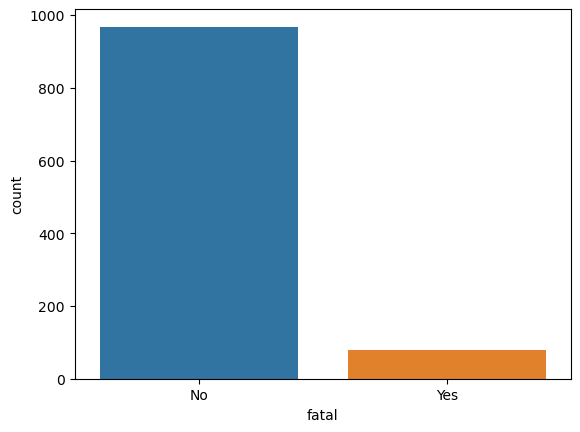

In [21]:
sns.countplot(x = "fatal", data = df)

<Axes: xlabel='type', ylabel='count'>

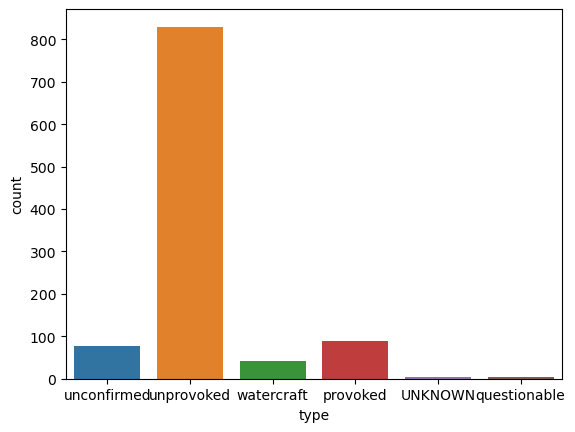

In [22]:
sns.countplot(x='type', data=df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Count'>

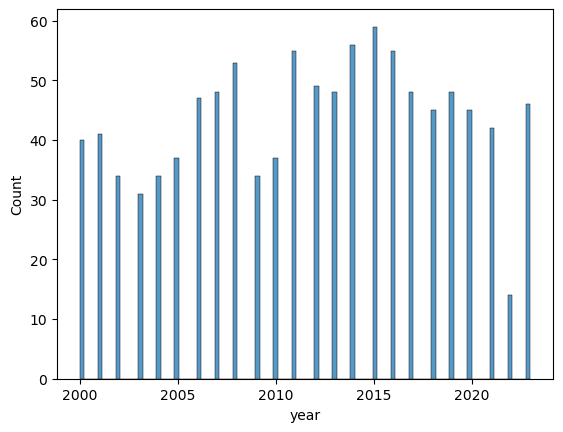

In [23]:
sns.histplot(df['year'], bins=100)

In [24]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing shark attack data with 'Country' and 'Fatal' columns

# Step 1: Filter the DataFrame to include only the top 5 countries with the highest number of fatalities
top_5_countries = df[df['country'].isin(top_5_countries_fatalities.index)]

# Step 2: Group the filtered DataFrame by 'Country' and count the number of fatalities in each country
top_5_countries_fatalities_count = top_5_countries.groupby('country')['fatal'].count()

# Step 3: Calculate the total number of fatalities in the rest of the world
rest_of_world_fatalities_count = df[~df['country'].isin(top_5_countries_fatalities.index)]['fatal'].count()

# Step 4: Plot the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries_fatalities_count.index, y=top_5_countries_fatalities_count.values, palette='Set1')
plt.bar('Rest of World Combined', rest_of_world_fatalities_count, color='gray')
plt.title('Number of Fatalities in Top 5 Countries vs. Rest of World Combined')
plt.xlabel('country')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.show()

NameError: name 'top_5_countries_fatalities' is not defined